# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


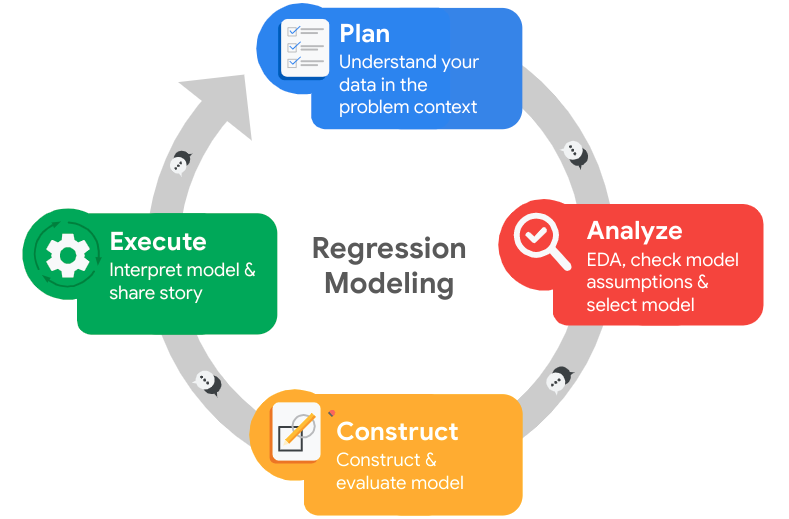

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish? 
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

* Who are your stakeholders for this project? HR Department @ Sailfort Motors
* What are you trying to solve or accomplish? To analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.
- What are your initial observations when you explore the data? Numerous binary categorical variables observed (encoded as 0-1)
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage? The model may be used incorrectly by HR to justify early layoffs. If the employee data is not anonymized, this can result in unfair discrimination or abuse.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 

#for data manipulation
import pandas as pd
import numpy as np

#for data viz
import matplotlib.pyplot as plt
import seaborn as sns

#for displaying all columns in dfs
pd.set_option('display.max_columns', None)

#for data modelling
#for XGB
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

#for metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
roc_auc_score, roc_curve

#save sets
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns = {"Work_accident" : "work_accident", 
                      "Department": "department",
                     "average_montly_hours": "average_monthly_hours",
                     "time_spend_company": "tenure"}, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum(axis=0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates().reset_index(drop=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Boxplot to show outliers in `tenure`')

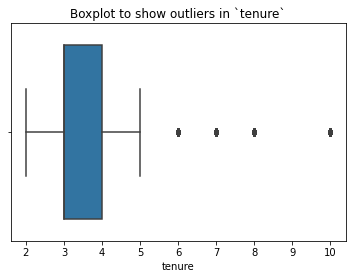

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df1, x="tenure", showfliers=True)
plt.title("Boxplot to show outliers in `tenure`")

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

#calculate IQR then 1.5*IQR to calculate the respective lowerbounds & upperbounds
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3-Q1
lower_b = Q1 - 1.5*IQR
upper_b = Q3 + 1.5*IQR

#from boxplot appears most outliers lie within the upperbound
outlier_count = df1[(df1['tenure'] > upper_b) | (df1['tenure'] < lower_b)]['tenure'].count()
print("Number of outliers in `tenure`: ", outlier_count)

Number of outliers in `tenure`:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("stayed:", round(df1['left'].value_counts(normalize=True)[0]*100,2),"%")
print("left:", round(df1['left'].value_counts(normalize=True)[1]*100,2),"%")

stayed: 83.4 %
left: 16.6 %


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

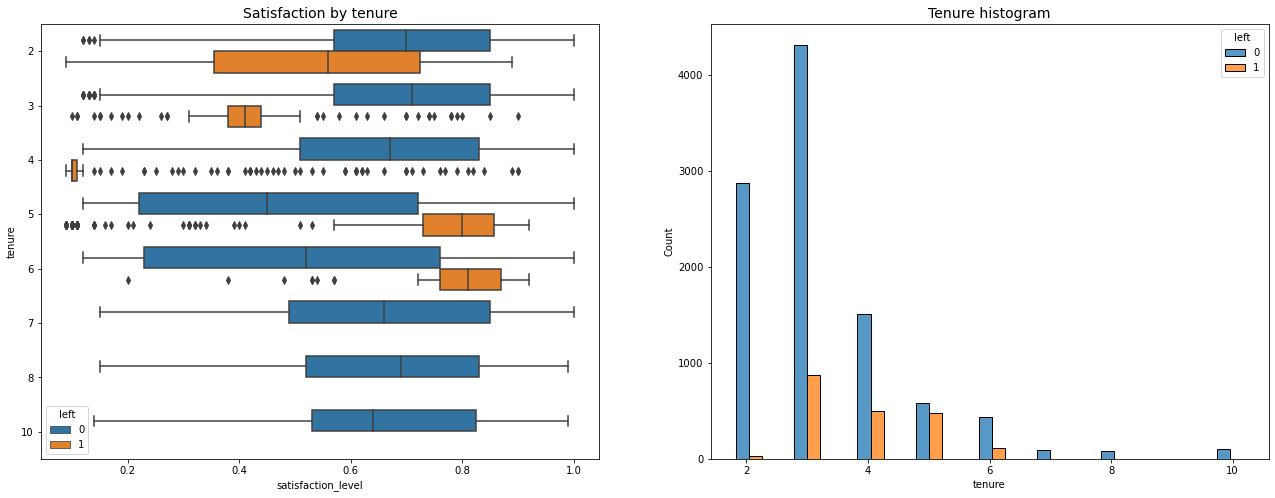

,median,mean
left,,
0,0.69,0.667365
1,0.41,0.440271


In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize = (22,8))

#check tenure and satisfaction level
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
#ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

#satisfaction level by tenure
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

#display the median satisfaction levels of left/stayed employees
df1.groupby('left')['satisfaction_level'].agg([np.median,np.mean])
#those that left have lower satisfaction level

- Employees that left generally fall into 2 types: dissatisfied employees with short tenures and satisfied employees with medium/long tenures
- Employees that have a 4 year tenure who have left have extremely low satisfaction scores (close to 0). Perhaps there may have been a significant restructuring at the 4 year mark
- Longest tenured employee did not leave and have similar satisfaction levels with employee that have a 2 year tenure
- Histogram shows that there are very low long-tenured employees with the mode of employees being in the company for 3 years

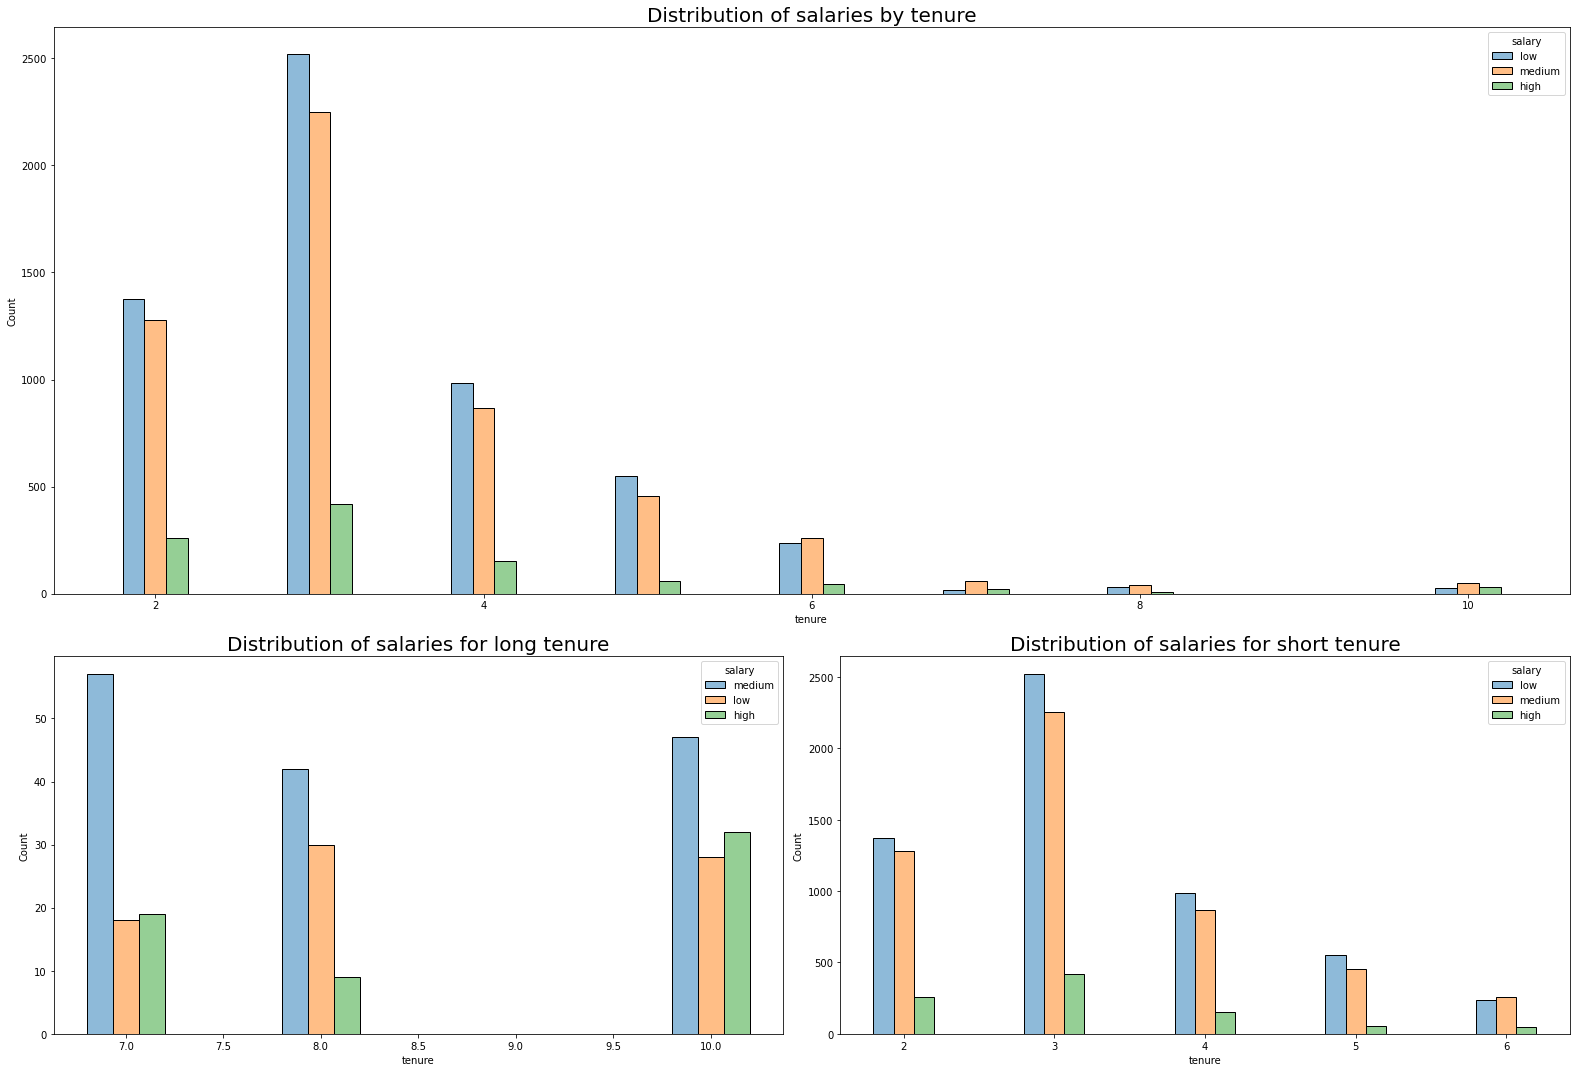

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

#now let's compare salary vs tenure, 

df1 

fig = plt.figure(figsize = (22,15))
gs = fig.add_gridspec(2, 2, height_ratios=[1.5, 1])  # Adjust heights of rows

#create subplots
ax1 = fig.add_subplot(gs[0,:])
sns.histplot(df1, x="tenure",hue="salary", multiple="dodge", alpha=0.5, shrink=0.4, discrete=1, ax = ax1)
ax1.set_title("Distribution of salaries by tenure", fontsize=20)
#since we can't visualize tenure properly for t = [7,8,9,10], we are going to split the dataset
long_tenure = df1[df1['tenure']>=7]
short_tenure = df1[df1['tenure']<7]

#plot long tenure
ax2 = fig.add_subplot(gs[1,0])
sns.histplot(long_tenure, x="tenure",hue="salary",multiple="dodge",
           alpha=0.5, shrink=0.4, discrete=1, ax=ax2)
ax2.set_title("Distribution of salaries for long tenure", fontsize=20)

#plot short tenure
ax3 = fig.add_subplot(gs[1,1])
sns.histplot(short_tenure, x="tenure",hue="salary",multiple="dodge",
           alpha=0.5, shrink=0.4, discrete=1, ax=ax3)
ax3.set_title("Distribution of salaries for short tenure", fontsize= 20)
plt.tight_layout()
#fig.subplots_adjust(top=0.88)
plt.show()

Based on the above plots, long tenured individuals do not have a significantly disproportionate higher salaries than short tenured individuals.

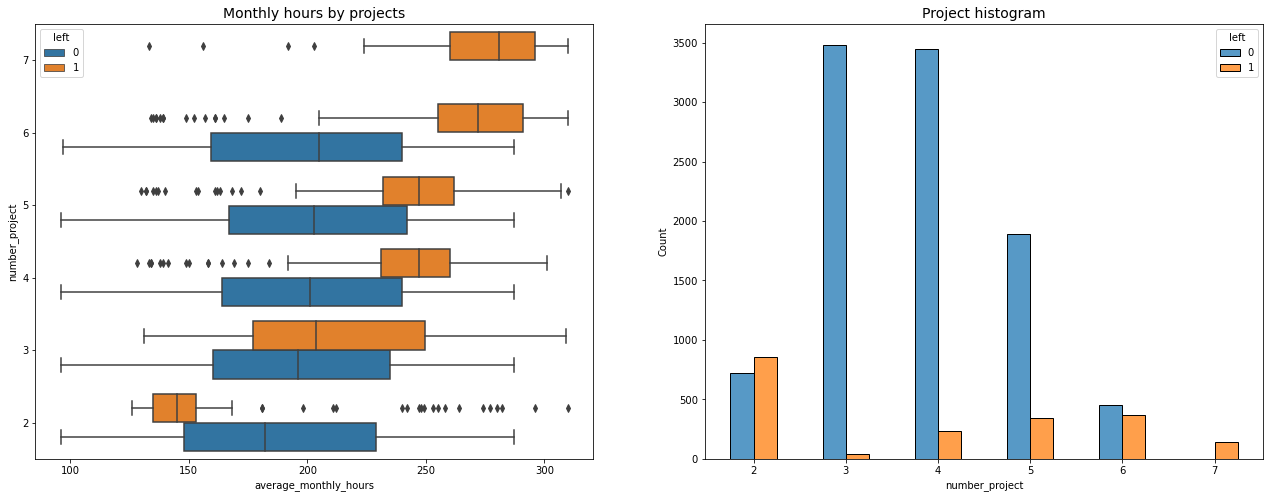

,number_project,left,proportion
0,2,0,725
1,2,1,857
2,3,0,3482
3,3,1,38
4,4,0,3448
5,4,1,237
6,5,0,1890
7,5,1,343
8,6,0,455
9,6,1,371


In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize = (22,8))

#check AMH and number of projects - suspect high number of project
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by projects', fontsize='14')

#check whether people who left had more number of projects
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=0.5, discrete=1, ax=ax[1])
ax[1].set_title('Project histogram', fontsize='14')
plt.show()

df2 = df1.groupby(['number_project','left'])['left'].size()
df2.reset_index(name ='proportion')

- In general, individuals who left worked longer hours than their stayed counterparts. It is also natural that people who had more projects would have to work longer hours.
- We can categorize 2 groups from the left plot:
- Group 1: Employees who left worked significantly shorter hours than their counterparts for the same number of projects. It is possible that they were either fired or serving notice, hence putting in lesser number of hours.
- Group 2: Employees who left worked significantly longer hours than their counterparts could have left due to being overworked.
- Everyone with more than 7 projects have left the company, and the interquartile ranges of this group and those who left with 6 projects was approximately 255-295h/mont. - much more than any other group
- Optimal number of projects seem to be 3 projects. Since the ratio of those that left vs those that stayed are very similar.
- Assume 40h work week, than the AMH(excl. vacation 2 weeks) = 50*(40)/12 = 166.67h/month. Every cohort that worked on more than 2 projects were working significantly longer hours - indicative of overworked.

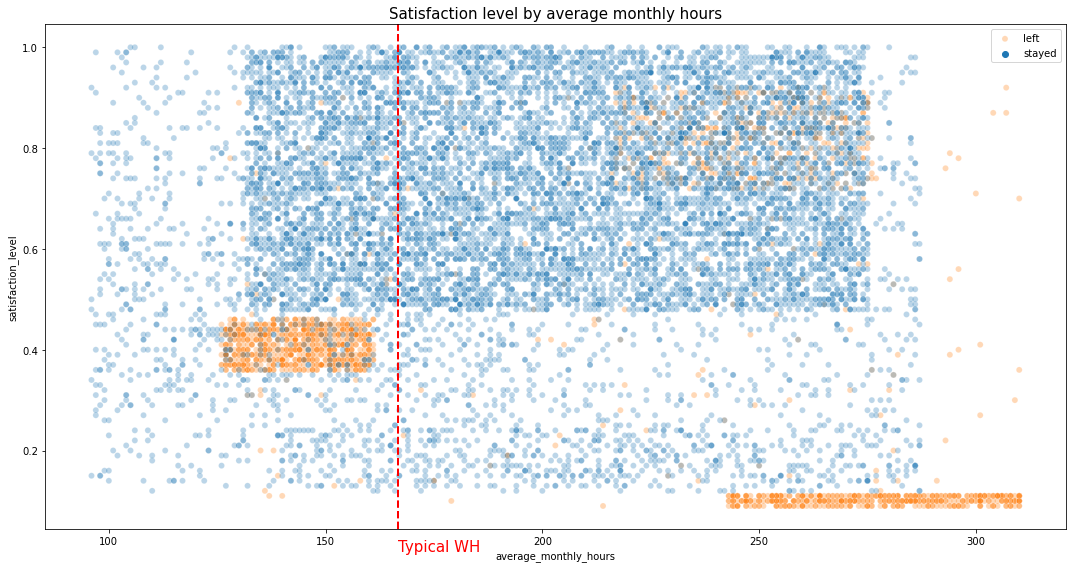

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

#now observe satisfaction level by number of hours worked via scatterplot

plt.figure(figsize = (15,8))
fig = sns.scatterplot(data=df1, x="average_monthly_hours", y="satisfaction_level", hue="left",alpha=0.3)
fig.set_title("Satisfaction level by average monthly hours", fontsize=15)
plt.legend(labels= ['left','stayed'])
plt.axvline(x=40*(52-2)/12, color="red", ls='--',linewidth=2)
plt.text(40*(52-2)/12,0,'Typical WH',color='red', fontsize=15)
plt.tight_layout()

We see 3 distinct clusters of employees who left. Namely, for employees working somewhere between 240-320hours (bottom right cluster) which are way over worked compared to the typical WH which is why their satisfaction levels are close to to 0. On the other hand we also observe individuals who left, who work between 220hours to 270hours (top right cluster) with satisfaction levels between 0.75 to 0.9. The last cluster (extreme left), who work between 110 to 160hours which is somewhat below the typical WH yet their satisfaction levels were about 0.4. It could be that they felt pressured to work more since mosto f their peers are working above 160hours, this pressure could possibly lower satisfaction levels.

Distribution of data is strange, which could be indicative of data manipulation/synthetic data

In [19]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

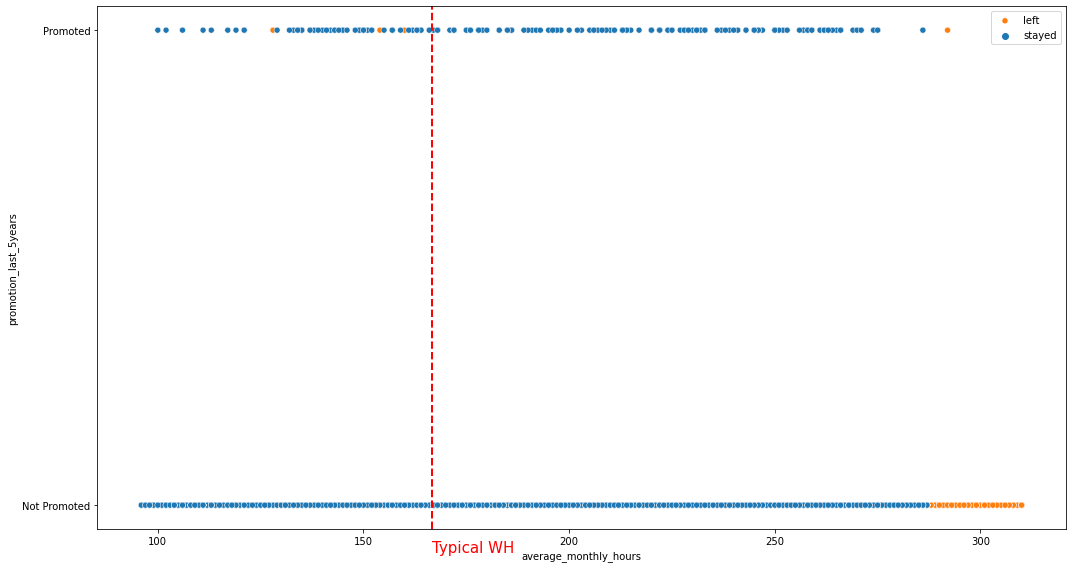

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
#now inspect whether individuals who left because they were not promoted in the last 5 years
fig = plt.figure(figsize = (15,8))
gs = fig.add_gridspec(1, 1)

#create subplots
ax1 = fig.add_subplot(gs[0,0])
sns.scatterplot(data=df1, x="average_monthly_hours",y="promotion_last_5years",hue="left",ax=ax1)
plt.legend(labels = ['left','stayed'])
plt.axvline(x=40*(52-2)/12, color="red", ls='--',linewidth=2)
plt.text(40*(52-2)/12,-0.1,'Typical WH',color='red', fontsize=15)
plt.yticks([0,1], labels=['Not Promoted', 'Promoted'])
plt.tight_layout()

Plot shows that very few employees were promoted in the last 5 years left
Very few employees that worked significantly longer hours were promoted
All of the employees who left were working long hours.

,department,left,proportion
0,IT,0,83.8%
1,IT,1,16.2%
2,RandD,0,87.8%
3,RandD,1,12.2%
4,accounting,0,82.4%
5,accounting,1,17.6%
6,hr,0,81.2%
7,hr,1,18.8%
8,management,0,88.1%
9,management,1,11.9%


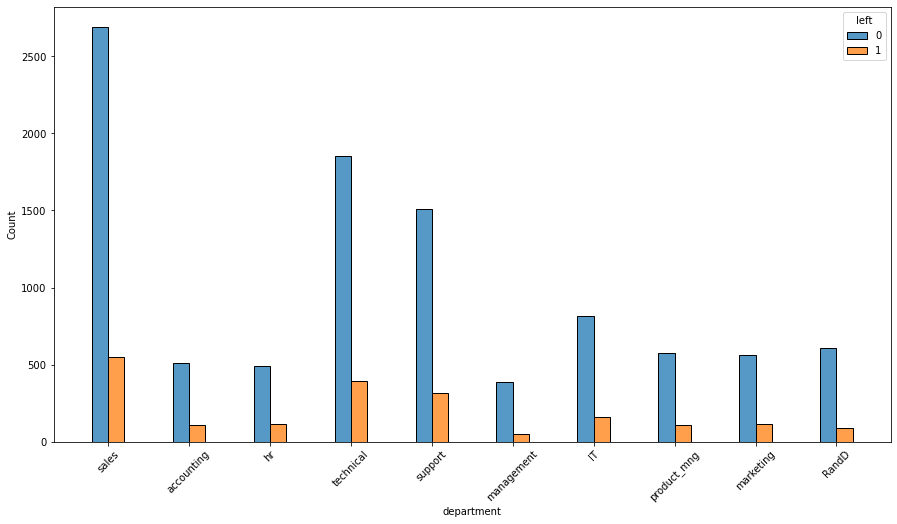

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
#now inspect distribution of employees who left across departments
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1,1)

ax1 = fig.add_subplot(gs[0,0])
sns.histplot(data=df1,
             x='department',
             hue='left',
             multiple='dodge',
             shrink = 0.4,
             discrete=1,
             ax = ax1,)
plt.xticks(rotation=45)

df2 = df1.groupby(['department'])['left'].value_counts(normalize=True).reset_index(name='proportion')
df2['proportion'] = round(df2['proportion']*100,1).astype('str') + '%'
df2

It is abit difficult to visualize proportions here. And it appears that in every single department the ratio of left:stayed is fairly similar. We can confirm that via 'group_by' and indeed, the ratio is approximately 4.5:1

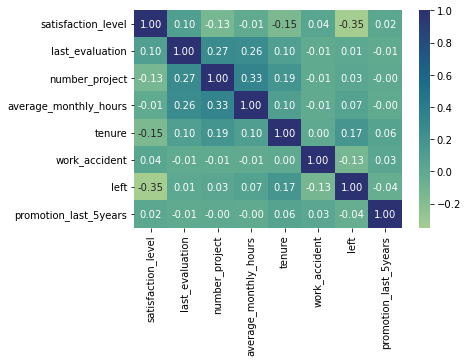

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
#create scatterplot to visualize correlations

# plt.figure(figsize=(16,9))
# heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

sns.heatmap(df1.corr(), annot = True, fmt = '.2f', cmap = 'crest')

The correlation heatmap confirms that number of projects, monthly hours and evaluaiton scores are positively correlated with one another. On the other hand, satisfaction level and whether employee leaves is negative correlated with one another.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

In summary, from the plots it seems that employees are leaving as a result of overwork, poor evaluation and management. Employees who left are associated with having worked longer hours, not receiving recognition (promotion) nor given good evaluation scores. There is a significant number of employees who are burnt out. Lastly, employees with a tenure with more than 6 years tends to stay in the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]
To predict if the employee quits or not -> categorical in nature and hence a classification task (binary).
There are only two possible outcomes - the employee stays (0) or quits (1). Based on the above visualizations, we can identify factors/variables that may incentivize them to leave are mainly: number of projects, monthly hours and evaluation scores as well as satisfaction level.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]
Since it is a categorical/classification task. We can use a couple of approaches
1) Binomial Logistic Regression
2) Decision Tree
3) Random Forest
4) XGBoost

### Modeling

Add as many cells as you need to conduct the modeling process.

### Binomial Logistic Regression


In [23]:
#First step is to identify violation of assumptions and doing label encoding
#check missing values
print(df1.isna().sum())

#check duplicates
print(df1.duplicated().sum())

#check dtypes
print(df1.dtypes)

#we need to use one hot encoding to convert categorical data (department) to numeric
#ordinal categorical data (salary) so it is better to encode to ordinal numeric
df1_lr = df1.copy()
df1_lr = pd.get_dummies(df1_lr, columns = ['department'], drop_first=True)
df1_lr['salary'] = df1_lr['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df1_lr.dtypes

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64
0
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object


satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                       int8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

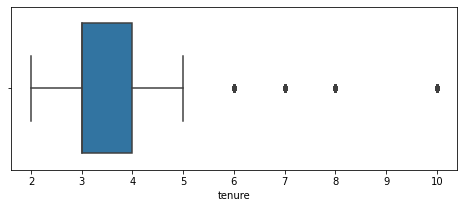

Number of outliers in `tenure`:  824
11991
11167
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0                 0   
2       4              0                      0       1                 0   
3       5              0                      0       0                 0   
4       3              0                      0       0                 0   
5       3              0                      0       0                 0   

 

In [24]:
#identify for any class imbalance
df1_lr['left'].value_counts(normalize=True)

#since class imbalance is not severe i.e. 90%:10%, we can proceed.
#now check for outliers.
plt.figure(figsize=(8,3))
sns.boxplot(df1_lr['tenure'], showfliers=True)
plt.show()

#calculate IQR then 1.5*IQR to calculate the respective lowerbounds & upperbounds
Q1 = df1_lr['tenure'].quantile(0.25)
Q3 = df1_lr['tenure'].quantile(0.75)
IQR = Q3-Q1
lower_b = Q1 - 1.5*IQR
upper_b = Q3 + 1.5*IQR

#from boxplot appears most outliers lie within the upperbound
outlier_count = df1_lr[(df1_lr['tenure'] > upper_b) | (df1_lr['tenure'] < lower_b)]['tenure'].count()
print("Number of outliers in `tenure`: ", outlier_count)
print(df1_lr['tenure'].count())
#drop outliers
df1_lr_final = df1_lr[(df1_lr['tenure'] <= upper_b) & (df1_lr['tenure'] >= lower_b)]
print(df1_lr_final['tenure'].count())
df1_lr_final.head()

#isolate y and X var
y = df1_lr_final['left']
X = df1_lr_final.drop(columns=['left'], axis=1)
print(X.head())

In [25]:
#split data set into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.25,
                                                    random_state=42)

In [26]:
#instantiate logisitc regression model
clf = LogisticRegression(random_state=42, max_iter=800).fit(X_train, y_train)

In [27]:
clf.coef_

array([[-4.38805465e+00,  4.55168088e-02, -4.91859507e-01,
         3.58141471e-03,  1.10650889e+00, -1.53194314e+00,
        -1.16862228e+00, -5.23318271e-01, -2.32426358e-01,
        -1.89439824e-01,  6.05320088e-02, -1.14229893e-01,
        -3.09508412e-02, -2.98003050e-02,  1.10611196e-01,
         1.26294448e-01,  1.12267523e-01]])

In [28]:
clf.intercept_

array([-1.40537444])

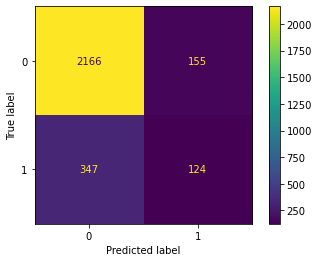

              precision    recall  f1-score   support

        stay       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



In [29]:
y_pred = clf.predict(X_test)

# compute values for confuion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = clf.classes_)
disp.plot(values_format='')
plt.show()

# classification report
print(classification_report(y_test, y_pred, target_names= ["stay","left"]))

#### Binomial Logistic Regression CM Interpretation
- Top left quadrant is the true negative: which our model correctly predicted those who actually stayed.
- Bottom right quadrant is the true positive: which our model correctly predict those who actually left.
- Top right quadrant is the false positive: which our model incorrectly predicted employees to leave but in fact did not leave.
- Bottom left quadrant is the false negative: which our model incorrectly predicted employees to stay but in fact did not stay.
- A perfect model would have resulted in neither false positives nor false negative.

###### Summary
The model achieved precision=79%, recall=82%, f1=80%, accuracy=82% (weighted). However if its more important to predict which employee has left the model scores significantly lower.It would be reasonable to explore other models since it is more important to predict employee churn.


### Decision Tree Classifier

In [30]:
df1_dt = df1_lr.copy()

#for decision tree, it is quite robust towards outliers. there is no need to exclude outliers here.
#we will also engage hyperparameter tuning
#declare the y & x variables
y = df1_dt['left']
X = df1_dt.copy()
X = df1_dt.drop(columns = ['left'], axis=1)

#split test and data sets respectively
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.25,
                                                    random_state=42)

In [31]:
#instantiate a tuned decision tree
decision_tree = DecisionTreeClassifier(random_state=42)

#assign dictionry of hyperparameters to search over
cv_params = {'max_depth':[2, 4, 6, 8, None],
             'min_samples_leaf': [2, 5, 10],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tuned_tree = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [32]:
%%time
tuned_tree.fit(X_train, y_train)

CPU times: user 4 s, sys: 50.6 ms, total: 4.06 s
Wall time: 4.05 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, None],
                      

In [33]:
tuned_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [34]:
tuned_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [35]:
tuned_tree.best_score_

0.9720951157100851

In [36]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [37]:
tuned_tree_results = make_results('Decision Tree CV', tuned_tree, 'auc')
tuned_tree_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.967544,0.917605,0.941876,0.981207,0.972095


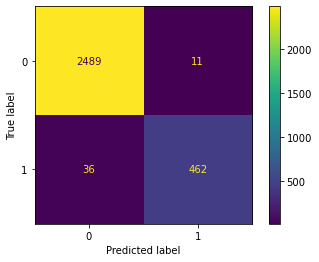

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      2500
        left       0.98      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [38]:
#prep confusion_matrix
y_pred = tuned_tree.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = tuned_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = tuned_tree.classes_)
disp.plot(values_format='')
plt.show()

# classification report
print(classification_report(y_test, y_pred, target_names= ["stay","left"]))

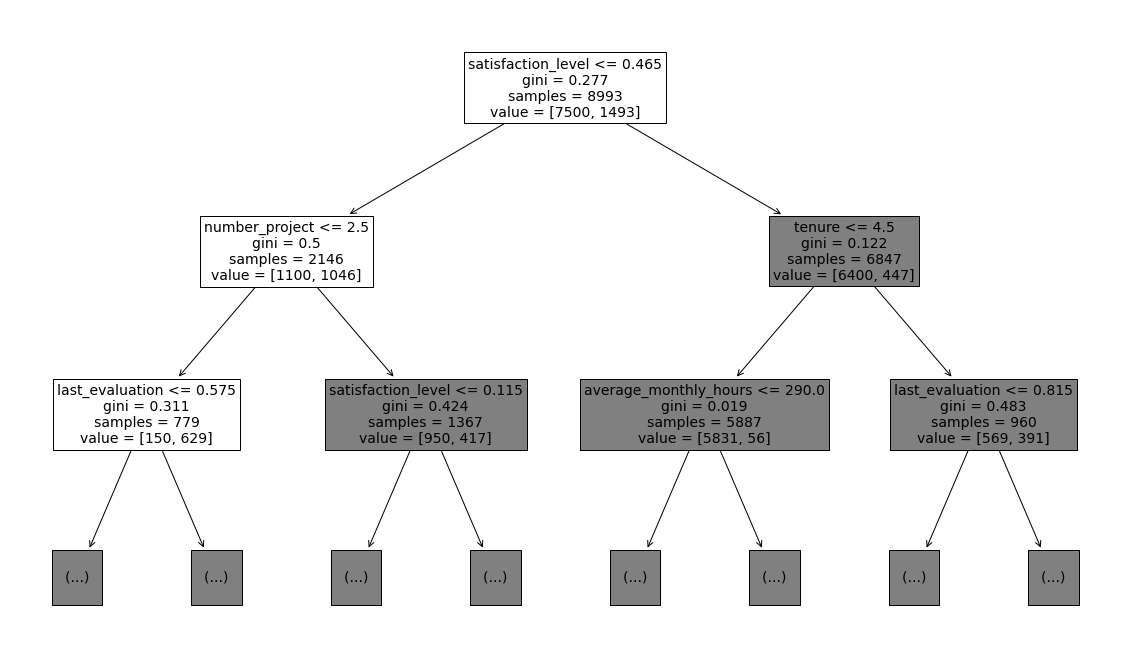

In [39]:
#now plot the best_tree

plt.figure(figsize=(20,12))
plot_tree(tuned_tree.best_estimator_,
         max_depth=2,
         fontsize=14,
         feature_names=X.columns);

The plot reaffirms our suspicion that number of projects, last_evaluation, satisfaction level and average monthly hours are key drivers to whether an employee leaves the company. Strangely, we see tenure appearing at one decision node. we can rank importances via the importance plot.

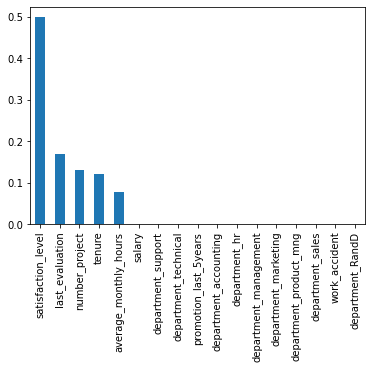

In [40]:
importances = tuned_tree.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [41]:
#get values for importances
tuned_tree_importances = pd.DataFrame(tuned_tree.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tuned_tree_importances = tuned_tree_importances.sort_values(by='gini_importance', ascending=False)

#GET IMPORTANT FEATURES WITH GINI > 0
tuned_tree_importances = tuned_tree_importances[tuned_tree_importances['gini_importance'] != 0]
tuned_tree_importances

,gini_importance
satisfaction_level,0.499476
last_evaluation,0.170062
number_project,0.131579
tenure,0.120583
average_monthly_hours,0.077950
salary,0.000150
department_support,0.000134
department_technical,0.000065


Feature importance graph confirms that the above mentioned vaiables are the most important features for the model.

#### Summary
The model achieved precision=98%, recall=98%, f1=98%, accuracy=98% (weighted). In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the employee would have left or retained, respectively).
The matrix also had a relatively lower number of false positives and false negatives (where the matrix incorrectly predicted that the employee would have left or stayed, respectively).
All of these scores from the decision tree model are strong indicators of good model performance.
Since decision trees can be vulnerable to overfitting we should utilize random forests to avoid overfitting by incorporating multiple decision trees to make predictions.

Random Forest Classifier model characteristics:
- Ensemble learning method combining multiple decision trees
- Uses bagging technique to reduce overfitting and improve generalization
- Handles both numerical and categorical data without the need for feature scaling
- Can handle large datasets efficiently
- Less sensitive to outliers due to majority voting mechanism
- Reduces variance and increases accuracy compared to individual decision trees

###  Random Forest Model

In [64]:
#declare y & x var
y = df1_dt['left']
X = df1_dt.copy()
X = df1_dt.drop(columns = ['left'], axis=1)

#split test and data sets respectively
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.25,
                                                    random_state=42)

#instantiate model
rf = RandomForestClassifier(random_state=42)

#assign dictionary of hyperparams to search
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [2,3,4],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [65]:
%%time
#fit the model
rf1.fit(X_train, y_train)

CPU times: user 13min 13s, sys: 1.44 s, total: 13min 15s
Wall time: 13min 15s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [66]:
path = '/home/jovyan/work'

In [67]:
with open(path + 'rf_cv_model.pickle', 'wb') as to_write:
    pickle.dump(rf1, to_write)

with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf1 = pickle.load(to_read)

In [68]:
rf1.best_score_

0.9813848211413138

In [69]:
rf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [71]:
#note this is still on training data
rf1_cv_results = make_results("Random Forest 1 ", rf1, "auc")
pd.concat([rf1_cv_results,tuned_tree_results], axis=0)

,model,precision,recall,F1,accuracy,auc
0,Random Forest 1,0.948110,0.916933,0.932219,0.977872,0.981385
0,Decision Tree CV,0.967544,0.917605,0.941876,0.981207,0.972095


Evaluation scores for the respective models on training data in terms of ROCAUC is better than that of the decision tree model. However all other metrics falls short.

In [72]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [73]:
#get prediction on test data for random forest
rf_test_scores = get_scores('Random Forest 1', rf1, X_test, y_test)
rf_test_scores


,model,precision,recall,f1,accuracy,AUC
0,Random Forest 1,0.950617,0.927711,0.939024,0.979987,0.959055


Test scores are similar to validation scores. Random forest is a good model.

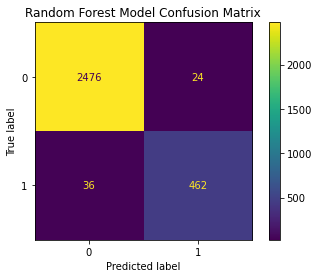

              precision    recall  f1-score   support

        stay       0.99      0.99      0.99      2500
        left       0.95      0.93      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998



In [86]:
#prep confusion_matrix
y_pred = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rf1.classes_)
disp.plot(values_format='')
plt.title("Random Forest Model Confusion Matrix")
plt.show()

# classification report
print(classification_report(y_test, y_pred, target_names= ["stay","left"]))

Text(0.5, 1.0, 'Ranked Importances (Random Forest Model)')

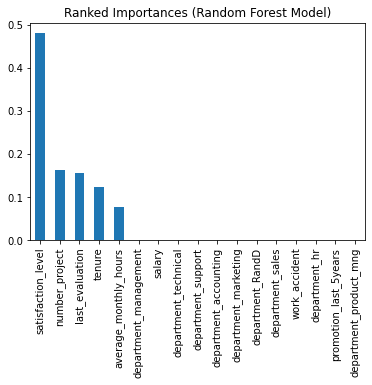

In [87]:
importances = rf1.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.title("Ranked Importances (Random Forest Model)")

The model achieved precision=98%, recall=98%, f1=98%, accuracy=98% (weighted). In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the employee would have left or retained, respectively). The matrix also had a relatively lower number of false positives and false negatives (where the matrix incorrectly predicted that the employee would have left or stayed, respectively). All of these scores from the random forest model are strong indicators of good model performance.

In [76]:
#we will now explore xgboost which is a bagging algorithm that enhances random forest classifier by sequentially improving on errors of each tree to improve model accuracy
#using xgboost with randomforest can better predict employee attrition

In [77]:
#Instantiate the XGBoost classifier
xgb = XGBClassifier(objective = "binary:logistic",
random_state = 42)
# Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators" : [50,100],
"max_depth" : [4, 5, 6],
"min_child_weight" : [1, 3, 5],
"learning_rate" : [0.01, 0.1, 0.2],
"subsample" : [0.7, 0.8],
"colsample_bytree" : [0.7, 0.8, 0.9]}
# Define a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}
# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, 
                      cv_params, 
                      scoring=scoring,
                      cv = 5, # cross-validation with number of folds
                      refit = "roc_auc", # score to optimize
                      n_jobs = -1, # use all processors to run in parallel
                      verbose = 1) # display computation time for each fold

In [78]:
%%time

xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 10.7min finished


CPU times: user 8min 37s, sys: 666 ms, total: 8min 37s
Wall time: 14min 57s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0

In [83]:
with open(path + 'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

with open(path + 'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [80]:
xgb_cv.best_score_

0.9863446267573494

In [81]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.8}

In [93]:
xgb_test_scores = get_scores('XGB scores', xgb_cv, X_test, y_test)
#concat all test scores
new = pd.concat([xgb_test_scores, rf_test_scores],axis=0)
pd.concat([new, get_scores('dt_scores', tuned_tree, X_test, y_test)],axis=0)

,model,precision,recall,f1,accuracy,AUC
0,XGB scores,0.978858,0.929719,0.953656,0.984990,0.962859
0,Random Forest 1,0.950617,0.927711,0.939024,0.979987,0.959055
0,dt_scores,0.976744,0.927711,0.951596,0.984323,0.961655


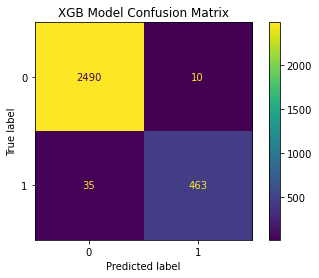

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      2500
        left       0.98      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [85]:
#prep confusion_matrix
y_pred = xgb_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = xgb_cv.classes_)
disp.plot(values_format='')
plt.title("XGB Model Confusion Matrix")
plt.show()

# classification report
print(classification_report(y_test, y_pred, target_names= ["stay","left"]))

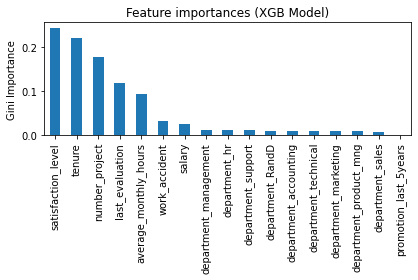

In [92]:
#plot the importances
importances = xgb_cv.best_estimator_.feature_importances_
xgb_cv_importances = pd.Series(importances, index=X_test.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
xgb_cv_importances.plot.bar(ax=ax)
ax.set_title('Feature importances (XGB Model)')
ax.set_ylabel('Gini Importance')
fig.tight_layout()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [94]:
pd.concat([new, get_scores('dt_scores', tuned_tree, X_test, y_test)],axis=0)

,model,precision,recall,f1,accuracy,AUC
0,XGB scores,0.978858,0.929719,0.953656,0.984990,0.962859
0,Random Forest 1,0.950617,0.927711,0.939024,0.979987,0.959055
0,dt_scores,0.976744,0.927711,0.951596,0.984323,0.961655


### Summary of model results

The XGB model achieved an even better result with higher evaluation metrics overall compared to the other models. Precision=98%, recall=98%, f1=98%, accuracy=98% (weighted) and highest AUC. This indicates the model is doing very well and should be chosen as the champion model. We also note the number of false positives and false negatives have been reduced compared to the random forest model. The bar plot also demonstrates that `satisfaction_level`, `tenure`, `number_project`, `last_evaluation` and `average_monthly_hours` have the highest importance (in decreasing order) and are pivotal in predicting the outcome variable `left`.

### Conclusion
The model and the feature importances point to our initial hypothesis that perhaps emplyoees may be overworked. To improve employee attrition we recommend:
- Reduce the number of projects for each employee to a mean of 3.
- Promote employees who have been in the company for at least 4 years, as well as conduct detailed focus group studies on why employees with tenure of at least 4 years have such poor satisfaction levels
- Recognize and reward employees that are overworking or make it non-mandatory for such employees to do overtime if they are doing it just because everyone else is doing so (company culture)
- There is supsicion of potential data leakage at `satisfaction level` where employees may not report poor scores due to fear of retaliation. It is also possible that `average_monthly_hours` is a source of leakage where emplyoees on that have tendered/leaving will tend to work shorter hours.

### Next Steps
- It would be useful to try and drop these variables or conduct feature engineering to better predict employee attrition. 
- We should also predict `last_evaluation` as more often than not evaluation scores are used to determine whether an employee leaves or stays.
- We can conduct K-means models on the data to analyze relationships between clusters of employees that are leaving and what is the key variables contributing for each of these clusters. Then, HR can work on improving these variables to encourage certain clusters to retain. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.